In [1]:

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"abhisekhbhagat","key":"64f8eff816fcb19176f696dfefb22723"}'}

In [2]:
! mkdir ~/.kaggle

! cp kaggle.json ~/.kaggle/

In [3]:
! chmod 600 ~/.kaggle/kaggle.json

In [4]:
! kaggle datasets download meowmeowmeowmeowmeow/gtsrb-german-traffic-sign


Dataset URL: https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign
License(s): CC0-1.0
 98% 601M/612M [00:04<00:00, 156MB/s]
100% 612M/612M [00:04<00:00, 140MB/s]


In [5]:
import zipfile
with zipfile.ZipFile("gtsrb-german-traffic-sign.zip", 'r') as zip_ref:
    zip_ref.extractall("gtsrb-dataset")

In [6]:
import os
import pandas as pd
import shutil

# Load the CSV file
csv_file = "/content/gtsrb-dataset/Test.csv"  # Replace with the correct path to your CSV file
test_folder = "/content/gtsrb-dataset/Test"  # Replace with the correct path to your test folder
output_folder = "Organized_Test"  # Folder to store organized images

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Read the CSV file
df = pd.read_csv(csv_file)

# Loop through the dataframe
for _, row in df.iterrows():
    class_id = row["ClassId"]
    image_path = row["Path"]

    # Ensure the class subfolder exists
    class_folder = os.path.join(output_folder, str(class_id))
    os.makedirs(class_folder, exist_ok=True)

    # Copy the image to the class folder
    src_path = os.path.join(test_folder, os.path.basename(image_path))
    dst_path = os.path.join(class_folder, os.path.basename(image_path))
    shutil.copy(src_path, dst_path)

print("Images organized into class subfolders successfully!")

Images organized into class subfolders successfully!


In [7]:
from torch import nn
import numpy as np
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torchvision import datasets, transforms
from  torch import optim
from torchvision import transforms, utils, models

from collections import OrderedDict
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [8]:
print(device)

cuda:0


In [9]:
data_dir = "/content/gtsrb-dataset/"

# Training data transformations
train_transforms = transforms.Compose([
    transforms.RandomRotation(10),  # Small rotations to simulate tilted signs
    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),  # Adjust colors slightly
    transforms.RandomAffine(degrees=0, translate=(0.1, 0.1)),  # Small translations to simulate shifted signs
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])

# Testing/validation data transformations
test_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize all images to 224x224
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])  # Normalize with ImageNet stats
])


train_data = datasets.ImageFolder(data_dir + 'Train', transform=train_transforms)
test_data = datasets.ImageFolder(data_dir + 'Organized_Test', transform=test_transforms)

In [10]:
trainloader = torch.utils.data.DataLoader(dataset=train_data, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(dataset=test_data, batch_size=64,shuffle=True)

In [11]:
model =  models.resnet18(pretrained=True).to(device)
#print(model)

/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 117MB/s]


In [12]:
import torch.nn.functional as F
from torch import nn

class Dc_model(nn.Module):
    def __init__(self):
        super().__init__()
        # Fully connected layers
        self.linear1 = nn.Linear(512, 256)
        self.linear2 = nn.Linear(256,43)

    def forward(self, x):
        # First layer with ReLU, batch norm, and dropout
        x = F.relu(self.linear1(x))
        x = self.linear2(x)

        return x


In [13]:
model_ = Dc_model().to(device)
model_

Dc_model(
  (linear1): Linear(in_features=512, out_features=256, bias=True)
  (linear2): Linear(in_features=256, out_features=43, bias=True)
)

In [14]:
model.fc = model_

Epoch 1/20


Training Loss: 0.0037, Accuracy: 0.9334


Validation Loss: 0.0013, Accuracy: 0.9747
Epoch 2/20


Training Loss: 0.0007, Accuracy: 0.9882


Validation Loss: 0.0011, Accuracy: 0.9797
Epoch 3/20


Training Loss: 0.0006, Accuracy: 0.9902


Validation Loss: 0.0010, Accuracy: 0.9819
Epoch 4/20


Training Loss: 0.0006, Accuracy: 0.9908


Validation Loss: 0.0008, Accuracy: 0.9848
Epoch 5/20


Training Loss: 0.0003, Accuracy: 0.9942


Validation Loss: 0.0012, Accuracy: 0.9799
Epoch 6/20


Training Loss: 0.0003, Accuracy: 0.9948


Validation Loss: 0.0010, Accuracy: 0.9840
Epoch 7/20


Training Loss: 0.0004, Accuracy: 0.9943


Validation Loss: 0.0009, Accuracy: 0.9851
Epoch 8/20


Training Loss: 0.0004, Accuracy: 0.9943


Validation Loss: 0.0012, Accuracy: 0.9806
Epoch 9/20


Training Loss: 0.0004, Accuracy: 0.9941


Validation Loss: 0.0004, Accuracy: 0.9927
Epoch 10/20


Training Loss: 0.0003, Accuracy: 0.9960


Validation Loss: 0.0013, Accuracy: 0.9830
Epoch 11/20


Training Loss: 0.0002, Accuracy: 0.9969


Validation Loss: 0.0009, Accuracy: 0.9862
Epoch 12/20


Training Loss: 0.0003, Accuracy: 0.9962


Validation Loss: 0.0007, Accuracy: 0.9884
Epoch 13/20


Training Loss: 0.0002, Accuracy: 0.9976


Validation Loss: 0.0004, Accuracy: 0.9931
Epoch 14/20


Training Loss: 0.0003, Accuracy: 0.9955


Validation Loss: 0.0020, Accuracy: 0.9717
Epoch 15/20


Training Loss: 0.0002, Accuracy: 0.9978


Validation Loss: 0.0007, Accuracy: 0.9892
Epoch 16/20


Training Loss: 0.0002, Accuracy: 0.9974


Validation Loss: 0.0005, Accuracy: 0.9922
Epoch 17/20


Training Loss: 0.0002, Accuracy: 0.9971


Validation Loss: 0.0008, Accuracy: 0.9905
Epoch 18/20


Training Loss: 0.0002, Accuracy: 0.9972


Validation Loss: 0.0012, Accuracy: 0.9812
Epoch 19/20


Training Loss: 0.0002, Accuracy: 0.9966


Validation Loss: 0.0007, Accuracy: 0.9888
Epoch 20/20


Training Loss: 0.0001, Accuracy: 0.9986


Validation Loss: 0.0005, Accuracy: 0.9909


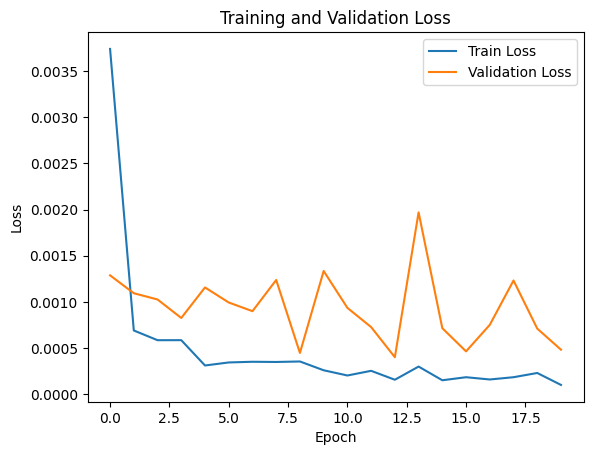

In [15]:
from tqdm import tqdm  # Progress bar library
import torch.optim as optim
import torch.nn as nn
import torch
import matplotlib.pyplot as plt

# Assuming `model`, `trainloader`, `testloader`, and `device` are already defined
for param in model.parameters():
    param.requires_grad = True
for param in model.fc.parameters():
    param.requires_grad = True

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
#scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=3, verbose=True)

train_loss = []
val_loss = []

epochs = 20

for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    # Training Phase
    model.train()
    running_loss = 0.0
    running_score = 0.0
    train_loop = tqdm(trainloader, desc="Training", leave=False)  # Training progress bar
    for image, label in train_loop:
        image = image.to(device)
        label = label.to(device)

        optimizer.zero_grad()
        y_pred = model(image)
        loss = criterion(y_pred, label)
        loss.backward()  # Calculate derivatives
        optimizer.step()  # Update parameters

        val, index_ = torch.max(y_pred, axis=1)
        running_score += torch.sum(index_ == label.data).item()
        running_loss += loss.item()

        # Update progress bar
        train_loop.set_postfix(loss=loss.item(), accuracy=running_score / len(trainloader.dataset))

    epoch_score = running_score / len(trainloader.dataset)
    epoch_loss = running_loss / len(trainloader.dataset)
    train_loss.append(epoch_loss)
    print(f"Training Loss: {epoch_loss:.4f}, Accuracy: {epoch_score:.4f}")

    # Validation Phase
    model.eval()
    running_loss = 0.0
    running_score = 0.0
    val_loop = tqdm(testloader, desc="Validating", leave=False)  # Validation progress bar
    with torch.no_grad():
        for image, label in val_loop:
            image = image.to(device)
            label = label.to(device)

            y_pred = model(image)
            loss = criterion(y_pred, label)
            running_loss += loss.item()

            val, index_ = torch.max(y_pred, axis=1)
            running_score += torch.sum(index_ == label.data).item()

            # Update progress bar
            val_loop.set_postfix(loss=loss.item(), accuracy=running_score / len(testloader.dataset))

    epoch_score = running_score / len(testloader.dataset)
    epoch_loss = running_loss / len(testloader.dataset)
    val_loss.append(epoch_loss)
    print(f"Validation Loss: {epoch_loss:.4f}, Accuracy: {epoch_score:.4f}")

    # Learning rate adjustment
    #scheduler.step(epoch_loss)

# Plot Losses
plt.plot(train_loss, label="Train Loss")
plt.plot(val_loss, label="Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.title("Training and Validation Loss")
plt.show()


In [16]:
import torch

# Assuming `model` is your ResNet with unfrozen layers and custom FC layers
model_path = "resnet_custom_fc_3.pth"

# Save the model's state_dict (recommended)
torch.save(model.state_dict(), model_path)

print(f"Model saved to {model_path}")


Model saved to resnet_custom_fc_3.pth


In [ ]:
import shutil

# Specify the folder to be zipped and the name of the output zip file
folder_to_zip = "/content/Dataset"  # Replace with your folder path
output_zip = "dataset.zip"  # Replace with your desired output zip file path

# Zip the folder
shutil.make_archive(output_zip.replace(".zip", ""), 'zip', folder_to_zip)

print(f"Folder '{folder_to_zip}' has been zipped as '{output_zip}'")


Folder '/content/Dataset' has been zipped as 'dataset.zip'
